# Preprocessing of data

### Importings

In [204]:
import pandas as pd
import matplotlib.pyplot as pyplot
import datetime

### Print length of dataset and first 10 rows of the data

In [205]:
data = pd.read_csv('train.csv', nrows=None)
original_length = len(data)
print(original_length)

1710670


In [206]:
subset_size = 1000

ratio_constant = subset_size / original_length

In [207]:
print("Original størrelse på datasettet:")
print(original_length)
data.head(10)

Original størrelse på datasettet:
1710670


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


### Removing unwanted rows from dataset

Remove all columns with MISSING_DATA=True. Because we only want the trips that do not miss any datapoint

In [208]:
data = data[data['MISSING_DATA']!=True]

In [209]:
print("New length of dataset:")
print(len(data))

print("Number of removed rows:")
print(original_length - len(data))

original_length = len(data)

New length of dataset:
1710660
Number of removed rows:
10


### Removing columns that we do not need anymore: 
ORIGIN_CALL, ORIGIN_STAND, TAXI_ID and MISSING_DATA (already used the info we needed from this column).

In [210]:
data.drop(['ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'MISSING_DATA', 'DAY_TYPE'], axis=1, inplace=True)
data.head(10)

,TRIP_ID,CALL_TYPE,TIMESTAMP,POLYLINE
0,1372636858620000589,C,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,1372637303,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,1372636951,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,1372637091,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,1372636965,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,1372637210,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,1372637299,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,1372637274,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,1372637905,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


# Create subsets and check if they are good enough

## Saving "expected" values. The number of rows from each call type

In [211]:
#finding the number of rows of each call type (A, B, C) in the original dataset
original_type_a_count = len(data[data['CALL_TYPE']=='A'])*ratio_constant
original_type_b_count = len(data[data['CALL_TYPE']=='B'])*ratio_constant
original_type_c_count = len(data[data['CALL_TYPE']=='C'])*ratio_constant

print(original_type_a_count)
print(original_type_b_count)
print(original_type_c_count)



213.23165777151644
478.10390081079345
308.6585957548797


In [212]:
#calculate the chi_square value given input which is the count from a subset. 
#Then calculate the value of the chi_square of the subset
def chi_square_call_type(type_a, type_b, type_c):
    part_a = ((type_a - original_type_a_count)**2)/original_type_a_count
    part_b = ((type_b - original_type_b_count)**2)/original_type_b_count
    part_c = ((type_c - original_type_c_count)**2)/original_type_c_count
    chi_square = part_a + part_b + part_c
    return chi_square

In [213]:
def get_info_from_timestamps(subset):
    hours_dict = {
        0:0,
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0,
        7:0,
        8:0,
        9:0,
        10:0,
        11:0,
        12:0,
        13:0,
        14:0,
        15:0,
        16:0,
        17:0,
        18:0,
        19:0,
        20:0,
        21:0,
        22:0,
        23:0
    }
    days_dict={
        "Monday":0,
        "Tuesday":0,
        "Wednesday":0,
        "Thursday":0,
        "Friday":0,
        "Saturday":0,
        "Sunday":0
    }
    months_dict={
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0,
        7:0,
        8:0,
        9:0,
        10:0,
        11:0,
        12:0
    }
    
    for row in subset['TIMESTAMP']:
        time = datetime.datetime.fromtimestamp(row)
        hours_dict[time.hour]+=1
        days_dict[time.strftime("%A")]+=1
        months_dict[time.month]+=1
    return hours_dict, days_dict, months_dict

### Saving original values for timestamp, expected values

In [214]:
original_hours, original_days, original_months = get_info_from_timestamps(data)

#print(original_hours)
#print(original_days)
#print(original_months)

In [215]:
def chi_square_timestamp(hours_dict, days_dict, months_dict):
    #DAYS
    chi_sum_days = 0
    for key in days_dict:
        chi_sum_days += (days_dict[key]-(original_days[key]*ratio_constant))**2/(original_days[key]*ratio_constant)
    if chi_sum_days <= 12.59:
        print("WEEKDAYS OK! " + str(chi_sum_days))
        #MONTHS
        chi_sum_months = 0
        for key in months_dict:
            chi_sum_months += (months_dict[key]-(original_months[key]*ratio_constant))**2/(original_months[key]*ratio_constant)

        if chi_sum_months <= 19.68:
            print("MONTHS OK! " + str(chi_sum_months))
            #HOURS
            chi_sum_hours = 0
            for key in hours_dict:
                chi_sum_hours += (hours_dict[key]-(original_hours[key]*ratio_constant))**2/(original_hours[key]*ratio_constant)

                if chi_sum_hours <= 35.17:
                    print("HOURS OK! " + str(chi_sum_hours))
                    return True
                
    return False
    

In [216]:
def print_histogram_timestamps(hours_dict, days_dict, months_dict):
    keys_hours = list(hours_dict.keys())
    values_hours = list(hours_dict.values())
    pyplot.bar(keys_hours, values_hours)
    pyplot.title("HOURS")
    pyplot.show()

    keys_hours = list(original_hours.keys())
    values_hours = list(original_hours.values())
    pyplot.bar(keys_hours, values_hours)
    pyplot.title("ORIGINAL HOURS")
    pyplot.show()

    keys_days = list(days_dict.keys())
    values_days = list(days_dict.values())
    pyplot.bar(keys_days, values_days)
    pyplot.title("DAYS")
    pyplot.show()

    keys_days = list(original_days.keys())
    values_days = list(original_days.values())
    pyplot.bar(keys_days, values_days)
    pyplot.title("ORIGINAL DAYS")
    pyplot.show()

    keys_months = list(months_dict.keys())
    values_months = list(months_dict.values())
    pyplot.bar(keys_months, values_months)
    pyplot.title("MONTHS")
    pyplot.show()

    keys_months = list(original_months.keys())
    values_months = list(original_months.values())
    pyplot.bar(keys_months, values_months)
    pyplot.title("ORIGINAL MONTHS")
    pyplot.show()

### Saving the timestamp-info from original data

In [217]:
#finding the number of rows of each hour, weekday and month from timestamp in the original dataset
original_hours_dict, original_weekdays_dict, original_months_dict = get_info_from_timestamps(data)


###

### Printing the histograms and calculating chi-square of each variable, both for the original dataset and the subset.

CALL_TYPE:

In [218]:
def print_histogram(column, subset):
    data_sorted = data.sort_values(by=column)
    subset_sorted = subset.sort_values(by=column)

    pyplot.hist(data_sorted[column], bins='auto')
    pyplot.xlabel(column)
    pyplot.ylabel('number of rows')
    pyplot.title('Original dataset. ' + column)
    pyplot.show()

    pyplot.hist(subset_sorted[column], bins='auto')
    pyplot.xlabel(column)
    pyplot.ylabel('number of rows')
    pyplot.title('Subset1, ' + column)
    pyplot.show()

Starter forsøk 1
CALL_TYPE OK!1.8782310806037226
WEEKDAYS OK! 8.893934089753193
MONTHS OK! 11.566240349119155
HOURS OK! 0.17829262689868347
TIMESTAMP OK!


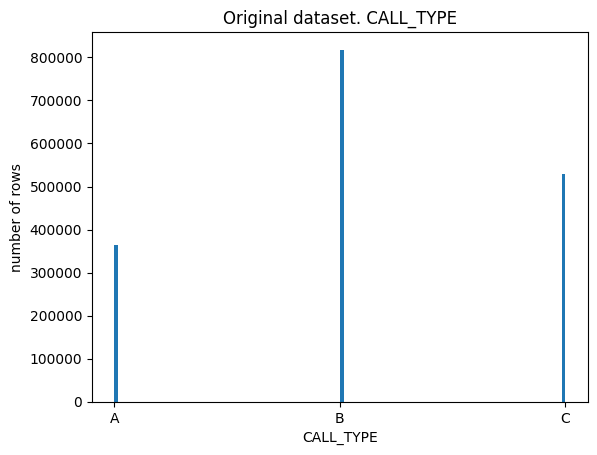

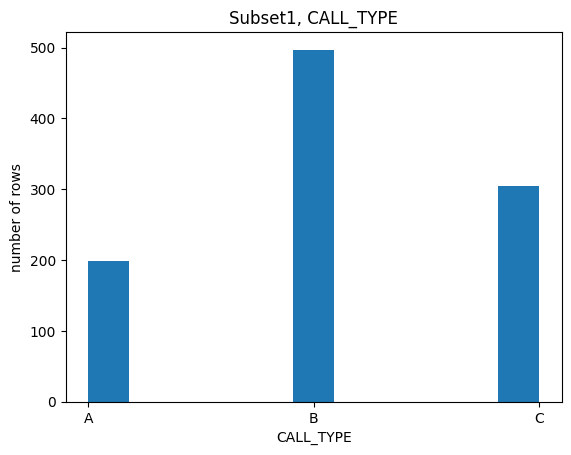

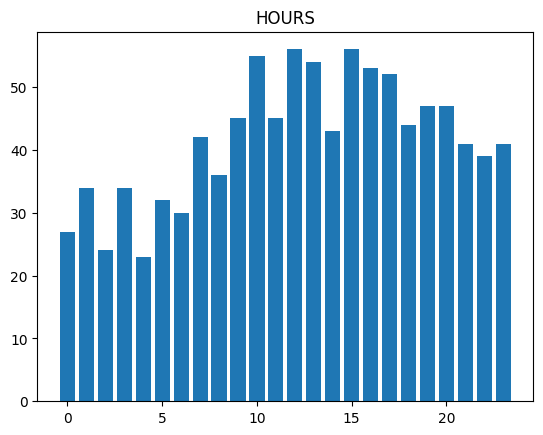

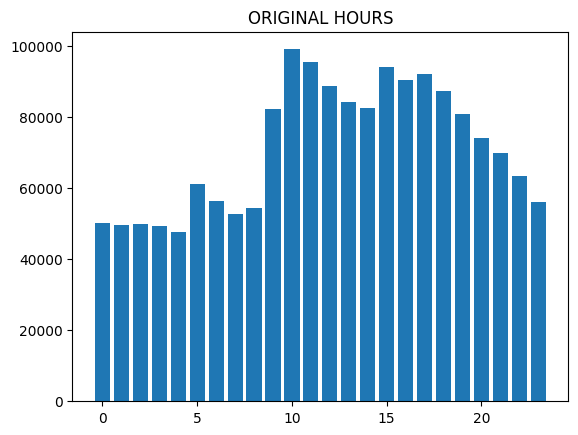

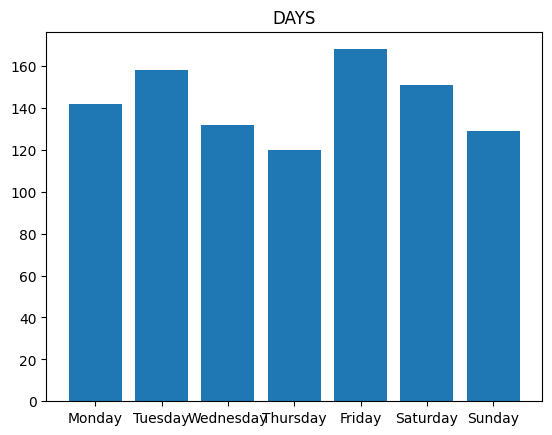

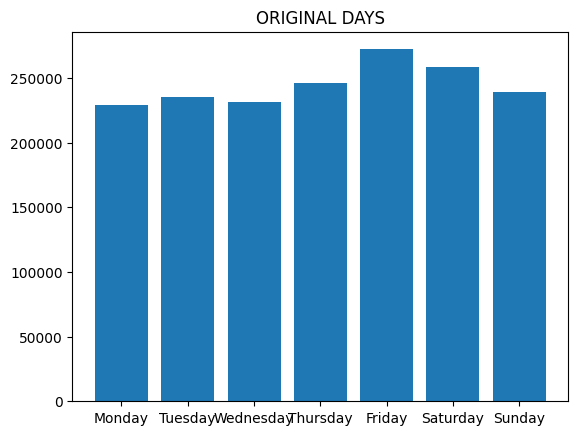

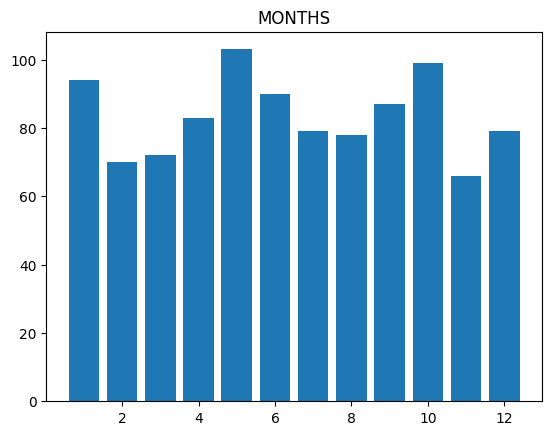

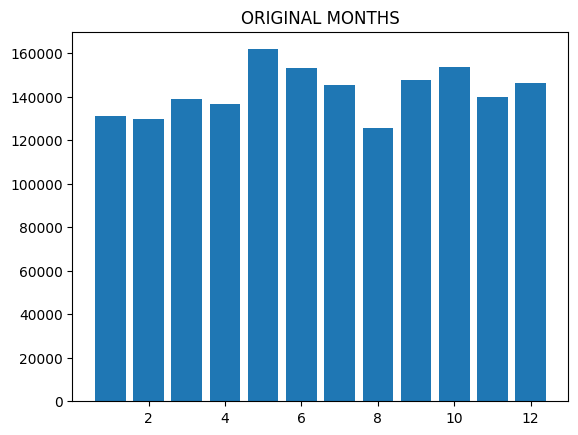

In [219]:
subset_ok = False
counter = 1
while subset_ok==False:
    subset = data.sample(n=subset_size)
    print("Starter forsøk " + str(counter))
    counter +=1
    #CALL_TYPE
    call_type_a = len(subset[subset['CALL_TYPE']=='A'])
    call_type_b = len(subset[subset['CALL_TYPE']=='B'])
    call_type_c = len(subset[subset['CALL_TYPE']=='C'])
    chi_square_call_type_result = chi_square_call_type(call_type_a, call_type_b, call_type_c)
    if chi_square_call_type_result <= 5.99:
        print("CALL_TYPE OK!" + str(chi_square_call_type_result))

        #TIMESTAMP
        hours_dict, weekdays_dict, months_dict = get_info_from_timestamps(subset)
        if chi_square_timestamp(hours_dict, weekdays_dict, months_dict):
            print("TIMESTAMP OK!")
            print_histogram('CALL_TYPE', subset)
            print_histogram_timestamps(hours_dict, weekdays_dict, months_dict)
            subset_ok=True